# Si Ptolomeo hubiese conocido a Fourier 

La motivación para compartir éste material es el agradecimiento y admiración que siento por los divulgadores que hay en ésta plataforma. Éste documento tiene la intención de aportar un granito de arena a éstas iniciativas. 

## Librerías usadas 

In [1]:
import compass_functions as cf
import pandas as pd
import sympy as sp
import mpmath as mp 
import numpy as np
from scipy.fft import fft, ifft
from latex2sympy2 import latex2sympy, latex2latex
from manim import *
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
from manim_voiceover import VoiceoverScene 

from manim_voiceover.services.recorder import RecorderService
from manim_voiceover.services.gtts import GTTSService
import warnings
warnings.filterwarnings("ignore")
config.media_width = "100%"
config.verbosity = "WARNING"

from sympy import symbols, Eq, latex, sqrt,solve ,Function 
from sympy import   I, simplify, expand , print_latex,init_printing
from sympy import Symbol, sin,cos,arg,exp ,integrate,Derivative,Integral  
from sympy.utilities.lambdify import lambdify
sp.init_printing()
from IPython.display import Markdown as md
#DSP con placa de audio 
import sounddevice as sd
# Ajustes del fondo de plot para matplotlib 
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "white",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})



Manim Community v0.17.3

https://voiceover.manim.community/en/latest/quickstart.html

## Plots en Manim 

In [2]:
# %%manim -qh PlotIntro
# t=np.linspace(0,2*np.pi,360)
# omega_x=1
# omega_y=2
# a=2
# b=1

# theta_xp=(a/2)*np.exp(1j*omega_x*t)
# theta_yp=(b/2)*np.exp(1j*omega_y*t)
# theta_xn=(a/2)*np.exp(-1j*omega_x*t)
# theta_yn=(-b/2)*np.exp(-1j*omega_y*t)
# lemniscata=theta_xp+theta_xn+theta_yp+theta_yn

# leminscata_pure=a*np.cos(t)/(1+(np.sin(t))**2)+1j*a*np.cos(t)*np.sin(t)/(1+(np.sin(t))**2)
# complex_arrays=[theta_xp,theta_yp,theta_xn,theta_yn,leminscata_pure] #,lemniscata
# run_time=24        # Tiempo total de la animacion
# esperar=3
# angles = np.angle(-theta_xp)
# normalized_angles = (angles - np.min(angles)) / (np.max(angles) - np.min(angles))

# class PlotIntro(Scene):
#     def construct(self):
      
        
#         theta_text = MathTex(r"\tau")
#         self.play(Write(theta_text))

#         # dot_f1 = Dot(point=(f1.real, f1.imag, 0),color=WHITE)
#         # dot_f2 = Dot(point=(f2.real, f2.imag, 0),color=WHITE)        
#         #self.add(dot_f1,dot_f2)

#         dots_groups = []
#         for complex_array in complex_arrays:
#             dots_group = self.plot_complex_points(complex_array)
#             dots_groups.append(dots_group)

#         self.play(*[Write(dots_group, run_time=run_time,lag_ratio=1) for dots_group in dots_groups])

#         self.wait(esperar)
    


#     def plot_complex_points(self, complex_array):
#         dots = VGroup()
        
#         colormap = plt.get_cmap("hsv")
#         for complex_point, angle in zip(complex_array, normalized_angles):
#             rgb_color = colormap(angle)[:3]  # Extract RGB values
#             hex_color = "#" + "".join([f"{int(c * 255):02x}" for c in rgb_color])
#             dot = Dot(complex_to_R3(complex_point), color=hex_color,fill_opacity=0.3)
#             dots.add(dot)

#         return dots



     

## Intro

Ésta es una historia de ficción que tiene el objetivo de ayudar a ilustrar algunas intuiciones matemáticas que considero interesantes. 

La intención es que el contenido sea agradable para cualquier persona que no esté familiarizado con los temas tratados.  

Pero al mismo tiempo se agregarán detalles que pueden ser de interés para estudiantes de bachillerato o ya en nivel universitario. 

Tal vez sea de interés para docentes, ya que en la descripción hay un link a el código fuente usado para la realización de éste contenido usando SymPy, Manim, NumPy, Matplotlib, y varias librerías de Python adecuadas tanto para el cálculo y la manipulación simbólica sino también para la creación de contenido audiovisual en un workflow simplificado que me ha sido de utilidad ya que  soy nuevo en éste lenguaje y cómo seguro muchos viendo éste video vengo de la época en que se usaba Matlab. 


## Epiciclos, Atlas del tiempo y Números Compás
Para situarnos en éste experimento mental imaginaremos inicialmente un modelo simplificado de 3 cuerpos celestes tipo Estrella-Planeta-Satélite .(Sol-Tierra-Luna) 

Plantearemos los temas imaginando como serían presentados típicamente en un planeta ficticio (similar al nuestro)  que llamaremos Tau. 

En Tau los equivalentes a nuestros Ptolomeo / Copérnico /Kepler (En la historia de Tau tendremos uno solo que llamaremos simplemente Claudius) y el equivalente a Fourier (que llamaremos Joseph) fueron contemporáneos y amigos ambos estudiantes en la clase del profesor Hard Leon  (Cómo se llamaba en Tau el equivalente del gigante Leonhard Euler). 

En nuestro planeta Tierra, éstos personajes históricos junto con otros que mencionaremos con sus seudónimos  tales como Lissajous (En Tau llamado Antoine ) o J.S. Bach (en Tau lo llamaremos Sebastian), no fueron  contemporáneos (al menos no de la manera que ilustraremos en nuestro planeta ficticio). 

Por eso en nuestra historia paralela de Tau los pensaremos a-temporalmente sólo unidos por las relaciones entre sus descubrimientos individuales  y veremos cómo gracias a su gran profesor Hard Leon todos terminan descubriendo que están expresando lo mismo en diferentes lenguajes, mirando  y modelando la misma realidad fundamental desde distintas perspectivas. 


Podríamos haber elegido otros personajes históricos para hacer los paralelismos. Pero a medida que avancemos en el vídeo veremos por qué los elegidos son apropiados para dar una idea general y ayudar a la motivación/intuición  del público general y específicamente a estudiantes  que por primera vez se enfrentan a temas en la universidad que hacen uso de de las exponenciales complejas para, paradójicamente, simplificar los cálculos. 

También compartiré en la descripción un humilde documento con el código fuente usado para la creación de éste vídeo usando Python , y puntualmente se destaca el uso de la librería Manim creada por Grant S. y ahora mantenida por una enorme comunidad de desarrolladores que aprecian  la profunda  belleza de las clases magistrales  brindadas por éste gran divulgador.  

El documento también muestra como usar Sympy para manipulaciones simbólicas y transformaciones de expresiones matemáticas desde o hacia formato LaTeX y la creación de funciones NumPy equivalentes a las expresiones simbólicas  para poder hacer visualizaciones con Matplotlib. Todo desde una Jupyter Notebook que puede ser usada (con alguna modificación menor) sin problemas en Google Colab (ver links en la descripción ) 

Espero que los documentos compartidos sirvan también  a docentes para crear contenidos visuales y herramientas de análisis y cálculo complementarias a los temas que tratan en sus clases.  


## Números Compás 

Para dibujar la historia usaremos Números Complejos, pero justamente por que al usarlos todo resulta mucho mas fácil e intuitivo.

Por eso, no dejes de ver el video si no estás familiarizado con el tema, ya que espero que te quedes con intuiciones que te ayudarán a entenderlo luego. 

La idea original de éste vídeo era hacer una introducción básica a la idea de número bidimensional. Pero si entraba en todas las formalidades básicas en el formato típico  de la educación académica, nunca iba a poder terminar la historia que une todos los hilos. Es por eso que en la descripción habrá enlaces a introducciones formales recomendadas apropiadas para distintos niveles de familiaridad con los temas tratados. 

Imaginemos que en Tau a ésta idea de número de 2 dimensiones, al haber sido su línea histórica de descubrimientos muy distinta a la nuestra los terminaron llamando Números Compás. 

Éste nombre era apropiado, ya que  se sabía en la historia de Tau que Claudius usaba mucho el compás como instrumento de dibujo y medición y también usaba números bidimensionales en coordenadas polares y/o cartesianas que le indicaban en qué posición del papel representar cada instante/lugar de su modelo,se sabía que los usaba como notación para representar y aproximar curvas y analizar la mecánica celeste  de forma simplificada. 

En castellano, Compás  también es una palabra relacionada con la música mediante la idea de Ritmo  y ésto viene dado,como veremos, por la influencia del trabajo de Sebastian  en Tau.

Otro instrumento históricamente relacionado con el nombre elegido para los números mas populares en Tau, es el que usamos para ubicarnos en el espacio según el Campo Magnético de la Tierra que en castellano  llamamos Brújula (en inglés es Compass ).  

Y ésto era apropiado en Tau, ya que también tuvieron a un equivalente a J. C. Maxwell que describió la naturaleza ondulatoria del campo electromagnético inspirándose en intuiciones fundamentales de éste estilo. (Como ilustración de ésta relación, pensar cómo  es que el azúcar, al ser una molécula que tiene una determinada quiralidad, modifica el comportamiento de la luz  que pasa a través de un cilindro que contiene un líquido azucarado.(Ver  link en la descripción What is Wiggling ?)


## Qué relación tienen el calor, la luz y los epiciclos  ?

Entender cómo en Tau el trabajo de Joseph está íntimamente relacionado con el trabajo de Claudius llevará un poco de tiempo.  

Pero digamos como introducción que Joseph sufría mucho el frío (Según contó Steven S. en una entrevista con Grant S. ésto fue así en la Tierra, Fourier "tenía literalmente frío" ver link en la descripción). 

Es por ésto que Joseph en Tau,estaba buscando describir el comportamiento del calor usando el equivalente a  lo que en la Tierra llamamos ecuaciones diferenciales. 

Uno de los experimentos mentales de Joseph era unir dos barras metálicas una caliente y otra fría (o mejor dicho, menos caliente), y estudiar y tratar de modelar qué pasaba luego de un determinado tiempo $t$ con la distribución del calor entre las dos barras unidas. 

De forma misteriosa, inspirado por su profesor Hard Leon, ésto lo llevó a  aproximar una función que representada gráficamente tenía forma de escalón (ya que representaba un salto  entre las temperaturas de las dos barras en el punto de unión ). 

Las soluciones de esa ecuación diferencial, terminaron dando una solución que parecía funcionar usando la suma de "infinitas" combinaciones de ondas que tenían frecuencias que eran múltiplos enteros de una frecuencia fundamental que dependía de las longitudes de los materiales usados. (Ver fenómeno de Gibbs)


* PLOTS DE FENOMENO DE GIBBS

Claudius mientras tanto jugaba con  los cuerpos celestes usando modelos geocéntricos, heliocéntricos y otros. 


## Elipses y Simetrías 

Usó circunferencias inicialmente y luego se dió cuenta de que todo eran elipses de diferentes excentricidades, ya que todo lo que él era capaz de describir matemáticamente  veía que en esencia  estaba formado por la composición (o suma vectorial) de dos acciones/propiedades fundamentales opuestas  del tipo:

* (giro_sentido_anti_horario,giro_sentido_horario)

* $(+),(-)$ 

* (calor,frío)

* (luz,oscuridad) 

* (arriba, abajo)

* (derecha,izquierda)

* $(i,-i)$

* (1,-1)   



* Videos de elipses VARIOS (ver en documento complementario )


## Sumando epiciclos para ajustar modelos

La obsesión  de Claudius era sumar epiciclos de forma tal que se puedan predecir mediante modelos matemáticos sencillos las trayectorias documentadas de los cuerpos celestes.

Pero al igual que el trabajo de Joseph, sus ideas llegaron mucho mas lejos y tuvieron aplicaciones en infinidad de áreas del conocimiento en la historia de Tau. 


## La noche de los descubrimientos - La Órbita Cuadrada y la desaparición del Sol

Los historiadores científicos de Tau cuentan que Joseph y Claudius tomaron nota  de las similitudes de sus trabajos cuando ambos en una noche larga de charla mientras estudiaban para la próxima clase con Hard Leon terminaron intentando calcular cuántas sub-lunas harían falta y con qué radios y períodos orbitales tendrían que girar una alrededor de la otra, para que sumando epiciclos se logre una órbita final anual en la que todo el año se vea  como un cuadrado.  


## ¿Qué le pasa a la trayectoria de una bola girando atada a un resorte si se suelta el resorte desde el centro? 

Si bien no cubriremos éste aspecto en profundidad en éste vídeo (ya que no soy físico y me gustaría que algún físico que vea ésto nos lo explique apropiadamente) vale mencionar que  esa noche, luego de unas cuantas cervezas, Joseph y Claudius postularon que que si el sol desapareciera  (perdiendo toda su masa) instantáneamente, ellos recién notarían el cambio en sus cuerpos luego de unos 8 minutos, durante los cuales el planeta seguiría girando normalmente en su órbita hasta salir disparado de forma similar a como saldría disparada una bola atada a un resorte que hacemos girar a una velocidad constante y luego soltamos el resorte .En Tau todo ésto a su vez tenía relación con el trabajo de  J. Clerk M. completado por Hermann M. y su curiosa introducción del tiempo como una coordenada más y luego gravitando todo hacia el trabajo de su despeinado discípulo Alberto ) (Ver links en la descripción)


## Figuras de Lissajous y el armonógrafo de Antoine 

Imaginaremos como Antoine  ayuda a Claudius y a Joseph a dibujar sus ideas usando ecuaciones paramétricas de las funciones usadas en sus modelos, con la ayuda de en un instrumento muy similar a lo que llamamos osciloscopio aquí en la Tierra.

* Plot Ejemplo paraméticas (ver en doc adjunto )


Podemos imaginar una especie de osciloscopio Steampunk, con propiedades especiales para darle un toque retro-futurista a la historia. Imaginemos que todas las visualizaciones que vendrán mas adelante, eran realizadas por ellos mientras compartían sus descubrimientos. 


## The Well-Tempered Clavier

Sebastian los inspira ese día logrando tocar 24 piezas musicales de idéntica construcción,pero en diferentes "tonalidades".  12 inspiradas progresivamente en  las horas mas luminosas del día y otras 12 para las horas menos luminosas (oscuras) del día. Un músico podrá apreciar la relación que tiene ésto con la escala menor y la escala mayor y las representaciones circulares de los símbolos musicales. 


## Calendario circular 

Veremos que, en Tau, usaban un calendario circular de resolución horaria. Cada hora estaba identificada también  por un color que se podía apreciar mirando a su estrella central con un instrumento apropiado. 


## El juego de Claudius - sumando Epiciclos 

Comenzando por el más pequeño de los cuerpos del sistema básico (E)strella-(P)laneta-(S)atélite definimos ingenuamente lo siguiente:

Si en el conjunto Tierra-Luna  el período en formato días-horas-minutos-segundos es $ T_l=29\space  d\space \space 12\space h\space \space 44\space m\space \space 2.9 \space s  $ en Tau supondremos que es exactamente un número entero apropiado para tener 12 meses de 30 días teniendo un año con un total exacto de 360 días (Podrás ir imaginando por  qué elegimos el  nombre del planeta como Tau  siendo $\tau=2\pi$) la longitud recorrida a lo largo de una vuelta completa ($360º$) en una circunferencia de radio $1u$ 

El período orbital del satélite  en Tau es entonces:

$$T_S=30d$$ 

Si en el sistema Tierra-Luna el radio orbital promedio de la luna es  $384,403 km$ en Tau tomaremos un camino un tanto sinuoso para definir su valor final, comencemos por definir algunas relaciones fundamentales:

Consideremos que queremos aproximar la circunferencia con un polígono regular de $N$ lados de longitud $L$ con $N$ proporcional a $T_S$ podemos pensar en una expresión para el radio orbital del (S)atélite respecto del 
(P)laneta:


$$R_{SP}=R_{_N}\cdot L $$ 

Donde $R_{_N}$ será un factor que nos asegurará que estemos formando un polígono  regular con N lados de longitud L .

Si dibujamos el cuadrado es fácil ver  por ejemplo  que para $N=4$ y $L=1$ formamos un cuadrado de perímetro $4 u$ y si centramos el cuadrado en el punto $(0,0)$ vemos que el radio del polígono termina siendo la hipotenusa de un triángulo rectángulo,con ángulo respecto a la horizontal de  de :

$$\frac{\pi}{4}=\frac{\tau}{8}$$ 

o expresado en  grados $45º$. 

Vemos que  ambos lados tienen longitud $\frac{1}{2}$ por lo que nos queda:

$$R=\sqrt{\left(\frac{1}{2}\right)^2+\left(\frac{1}{2}\right)^2}=\frac{1}{\sqrt{2}}=\frac{\sqrt{2}}{2}$$ 

Con un poco de trigonometría es fácil ver que para cualquier N podemos generalizar usando la siguiente expresión : 

$$R_N=\frac{1}{2 \cdot \sin{\left(\frac{\pi}{N}\right)}}=\frac{1}{2 \cdot \sin{\left(\frac{\tau}{2N}\right)}}$$



# Figuras de Lissajous

Si en un osciloscopio, que normalmente tiene dos canales de entrada que podemos llamar (X,Y) ponemos dos señales sinusoidales distintas, es equivalente a ver la gráfica definida en ecuaciones paramétricas de :

$$x(t)=A_x \sin(\omega_x t+\alpha)$$

$$y(t)=A_y \sin(\omega_y t+\beta)$$

La relación entre las fases de las dos expresiones anteriores se suele llamar :

$$\delta=\alpha-\beta$$


También podemos escribir:

$$x(t)=A_x \cos(\omega_x t+\alpha-\frac{\pi}{2})$$

$$y(t)=A_y \sin(\omega_y t+\beta)$$


### Usando exponenciales complejas

$$x(t) = \frac{A_x}{2i} \left(e^{i(\omega_x t + \alpha)} - e^{-i(\omega_x t + \alpha)}\right)$$

$$y(t) = \frac{A_y}{2i} \left(e^{i(\omega_y t + \beta)} - e^{-i(\omega_y t + \beta)}\right)$$

$$z(t)=\frac{A_x}{2i} \left(e^{i(\omega_x t + \alpha)} - e^{-i(\omega_x t + \alpha)}\right)+i\frac{A_y}{2i} \left(e^{i(\omega_y t + \beta)} - e^{-i(\omega_y t + \beta)}\right)$$

Simplificando y expandiendo podemos escribir:

$$\frac{1}{2} i A_x e^{-i(\omega_x t + \alpha)} - \frac{1}{2} i A_x e^{i(\omega_x t + \alpha)} - \frac{1}{2} A_y e^{-i(\omega_y t + \beta)} + \frac{1}{2} A_y e^{i(\omega_y t + \beta)}$$

$$\frac{1}{2} i A_x \left(e^{-i \omega_x t} e^{-i \alpha} \right) - \frac{1}{2} i A_x \left(e^{i \omega_x t} e^{i \alpha} \right) - \frac{1}{2} A_y \left(e^{-i \omega_y t} e^{-i \beta} \right) + \frac{1}{2} A_y \left(e^{i \omega_y t} e^{i \beta} \right)$$

### Usando SymPy para expresar lo anterior

In [3]:
# Símbolos típicos definidos como reales o complejos
t=sp.Symbol('t',real=True)
i=sp.I #Constante imaginaria símbólica sqrt(-1)
pi=sp.pi # Pi en foma simbólica dentro de sympy
T_p=sp.Symbol('T',real=True) # Período usado en la expresión de omega
omega=sp.Symbol('omega',real=True)
omega_eq=sp.Equality(omega,2*pi/T_p)
Omega=sp.Symbol('Omega',complex=True)
theta=sp.Symbol('theta',real=True)
Theta=sp.Symbol('Theta',complex=True)
R=sp.Symbol('R',real=True)
L=sp.Symbol('R',real=True)

tau=sp.Symbol('tau',real=True)
tau_eq=sp.Equality(tau,2*pi)

cplx_exp_rect = cos(t)+i*sin(t)
cplx_exp_polar=exp(i*t) 
tau_eq





In [39]:
sp.conjugate(Omega)


### Latex2Sympy

Convertimos una expresión matemática que tenemos en LaTex a un objeto simbólico usando sympy. 

In [4]:
R_N_tex= r"\frac{1}{2 \sin{\frac{\pi}{N}}})"
R_N=latex2sympy(R_N_tex )
R_N


In [5]:
texx=r"\frac{1}{2} i A_x \left(e^{-i \omega_x t} e^{-i \alpha} \right) - \frac{1}{2} i A_x \left(e^{i \omega_x t} e^{i \alpha} \right) - \frac{1}{2} A_y \left(e^{-i \omega_y t} e^{-i \beta} \right) + \frac{1}{2} A_y \left(e^{i \omega_y t} e^{i \beta} \right)"
texx_sp=latex2sympy(texx)
texx_sp.simplify(complex=True).collect(sp.Rational(1,2))

In [6]:
a=sp.Symbol('a',real=True)
b=sp.Symbol('b',real=True)
ElipseImplicita_tex=r"\left(\frac{x}{a}\right)^2+\left(\frac{y}{b}\right)^2"

ElipseImplicita_sympy=sp.Eq(latex2sympy(ElipseImplicita_tex),1)
ElipseImplicita_sympy

In [7]:
F=sp.Symbol('F',complex=True)
foco_ab_tex=r"  \sqrt{a^2-b^2} "
foco_ab_sympy=sp.Equality(F,latex2sympy(foco_ab_tex))
foco_ab_sympy

### Sympy2Latex

Convertimos un objeto simbólico en SymPy a un string en LaTex . Muchas veces la forma mas sencilla de comenzar a escribir todas las ecuaciones a ser analizadas en modo simbólico y luego tomar el LaTex de esas expresiones. Excepto que nos estemos basando en cosas que ya tenemos en LaTex para lo cual sirve Latex2Sympy. 

In [8]:
# Notar que .rhs y .lhs hacen referencia al lado derecho e izquierdo de una Eq
Theta_t= sp.Equality(Theta**t,sp.exp(i*t)) 
Theta_t


In [9]:
# Obtener el string 
latex(Theta_t)

'\\Theta^{t} = e^{i t}'

In [10]:
print_latex(Theta_t )

\Theta^{t} = e^{i t}


In [11]:
print_latex(expand(Theta_t.rhs,complex=True) )

i \sin{\left(t \right)} + \cos{\left(t \right)}


$$\Theta^{t} = e^{i t}=\cos{\left(t \right)} + i \sin{\left(t \right)} $$

### Sympy2Numpy

Aquí veremos cómo convertir las expresiones simbólicas a funciones que funcionan con la librería numpy, de ésta manera podrás generar arrays que representen las funciones de forma discreta y realizar sus gráficas en matplotlib y manim.  

In [12]:
def get_npf(variable,expresion):
    # get_NumPy_Function ---> obtengo la función para numpy
    npf=lambdify(variable,expresion , modules=['numpy'])
    return npf

In [13]:
# Defino la función en SymPy
#a=sp.Rational(1,2)*(1+i)
a=sp.Integer(4)  # El 2 expresado en sympy como racional
b=sp.Integer(2)
R_add=sp.Rational(a+b,2)
R_subs=sp.Rational(a-b,2)
Elipse_21_compas=R_add*exp(i*t)+R_subs*exp(-i*t) 
# Obtengo su expresión en LaTex
Elipse_21_latex=latex(Elipse_21_compas)
Elipse_21_compas

In [14]:
a

In [15]:
b

In [16]:
""" 
Divido entre 2 para simplificar 
y expando para mostrar la otra forma del elipse
"""
eee=expand(Elipse_21_compas/2,complex=True,frac=True) 
eee

### Obtener parte real e imaginaria de la curva por separado 

De ésta manera obtenemos las ecuaciones paramétricas de las curvas que usaremos en el dispositivo de Antoine . 

In [17]:
r=Function('r',real=True)

elipse_real=eee.as_real_imag()[0]
elipse_imag=eee.as_real_imag()[1]
elipse_modulo=sp.Eq( r(t),sp.sqrt(elipse_real**2+elipse_imag**2))
elipse_angulo=sp.arg(elipse_real+i*elipse_imag)

In [18]:
elipse_modulo

In [19]:
elipse_angulo.simplify()

In [20]:
elipse_real

In [21]:
elipse_imag

In [22]:
x, y = symbols('x,y')
(x + y).expand(complex=True)

### Get Numpy Function: Obtengo función numpy para el Elipse de ejemplo

In [23]:
# Obtengo una función que puedo aplicar a 
# un  indice del tipo t_discreto=linspace(t_inicio,t_fin,N_muestras)
Elipse_21_func=get_npf(t,Elipse_21_compas)
Elipse_21_func

<function _lambdifygenerated(t)>

## Explorando la relación entre el Radio y el N-gon

Comenzando desde un triángulo $N=3$ y avanzando hasta  $N=6$ notamos que  nos da :

$$R_3=\frac{1}{2\sin{(\frac{\tau}{6})}}=\frac{1}{2\sin{(\frac{\pi}{3})}}=\frac{1}{\sqrt{3}}$$


$$R_4=\frac{1}{2\sin{(\frac{\tau}{8})}}=\frac{1}{2\sin{(\frac{\pi}{4})}}=\frac{1}{\sqrt{2}}$$

Para $N=5$ nos conviene recordar el valor del número irracional por excelencia:

$$\varphi=\frac{1}{2}(1+\sqrt{5})$$


$$R_5=\frac{1}{2\sin{(\frac{\pi}{5})}}=\frac{1}{\sqrt{3 - \varphi}}$$


$$R_6=\frac{1}{2\sin{(\frac{\tau}{12})}}=\frac{1}{2\sin{(\frac{\pi}{6})}}=1$$

#### Comprobamos el valor de $R_5$ en función del golden ratio

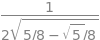

In [24]:
R_5=1/(2*sin(pi/5))
R_5

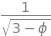

In [25]:
phi=sp.GoldenRatio
#phi=sp.Rational(1,2)*(1+sp.sqrt(5))

R_5_phi=1/(1*sp.sqrt(3-phi))
R_5_phi

In [26]:
# Vemos que son el mismo número de forma simbólica
(R_5_phi -R_5).simplify()

In [27]:
print_latex(R_5_phi)

\frac{1}{\sqrt{3 - \phi}}


In [28]:
phi

Text(0.5, 1.0, '$R_N=1 \\cdot \\frac{1}{2 \\sin{\\left(\\frac{\\pi}{N} \\right)}}$')

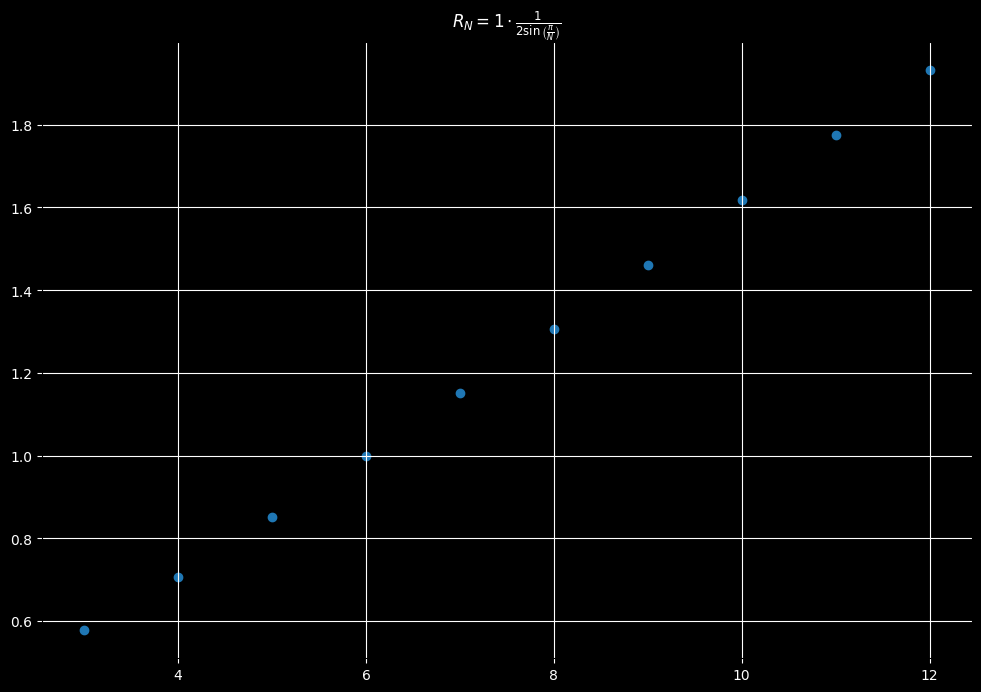

In [29]:
N=sp.Symbol('N',integer=True)
N_index=np.arange(3,13)
R_N_func=get_npf(N,R_N)
R_N_array=R_N_func(N_index)
plt.figure(figsize=(12,8))
#plt.plot(N_index,R_N_array)
plt.scatter(N_index,R_N_array)
plt.grid()
plt.title(f"$R_N={latex(R_N)}$")

In [30]:
R_N_array.sum()

### Sympy2Plot Elipse desde su expresión simbólica 

Text(-1, -1, '\n         Ejemplo usando N=39\n         $a= 4$ , $b=2$\n                  \n         $x(t)=2 \\cos{\\left(t \\right)}$\n         \n         $y(t)=\\sin{\\left(t \\right)}$\n\n        $\\left(\\frac{x}{a}\\right)^{2} + \\left(\\frac{y}{b}\\right)^{2} = 1$\n         \n         ')

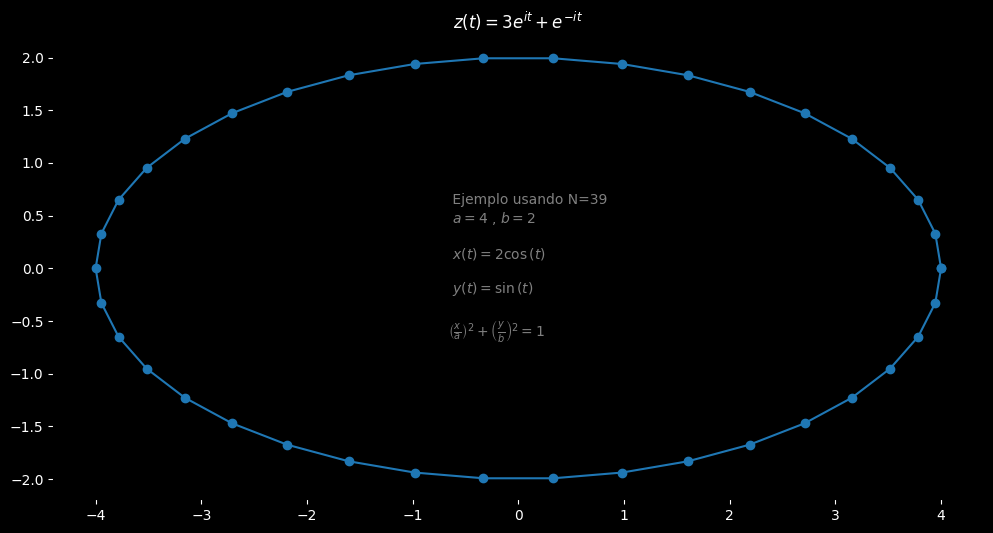

In [31]:
# Función en SymPy
Elipse_21_compas=R_add*exp(i*t)+R_subs*exp(-i*t)

# Función Equivalente para NumPy
Elipse_21_func=get_npf(t,Elipse_21_compas)
 
N_muestras=13*3
t_discreto=np.linspace(0,2*np.pi,N_muestras)


# Plot de la función con Matplotlib
ancho=12
alto=6
plt.figure(figsize=(ancho,alto))
plt.title(f"$z(t)= {Elipse_21_latex}$")
plt.plot(Elipse_21_func(t_discreto).real,Elipse_21_func(t_discreto).imag)
plt.scatter(Elipse_21_func(t_discreto).real,Elipse_21_func(t_discreto).imag)
#plt.grid()
#plt.text(0,0,f"$ {Elipse_21_latex}$")
plt.text(-1,-1,f"""
         Ejemplo usando N={N_muestras}
         $a= {latex(a)}$ , $b={latex(b)}$
                  
         $x(t)={latex(elipse_real)}$
         
         $y(t)={latex(elipse_imag)}$

        ${latex(ElipseImplicita_sympy)}$
         
         """,color='gray')

### Sym2Tex&Numpy (las dos anteriores en una)

In [32]:
def get_tex_and_npf(expresion,variable,values=np.linspace(0,2*np.pi , 360)):
    # Obtengo la función numpy, el texto para TeX y una secuencia
    # basada en la función en numpy en el rango de valores dado por "values".
    # La "expresión"  "variable" debe definirse con sympy fuera de la función 
    # Si "values" no se especifica para el array de salida
    # se toma de 0 a 2pi con 360 pasos discretos
    tex=latex(expresion)
    numpy_function=get_npf(variable,expresion)
    numpy_array=numpy_function(values)
    return tex,numpy_function,numpy_array  

### Expandir función trigonométrica 

In [33]:
x=sp.Symbol('x',real=True)
y=sp.Symbol('y',real=True)
cos(x + y).expand(trig=True)

In [34]:
expand(Theta_t.rhs,complex=True)

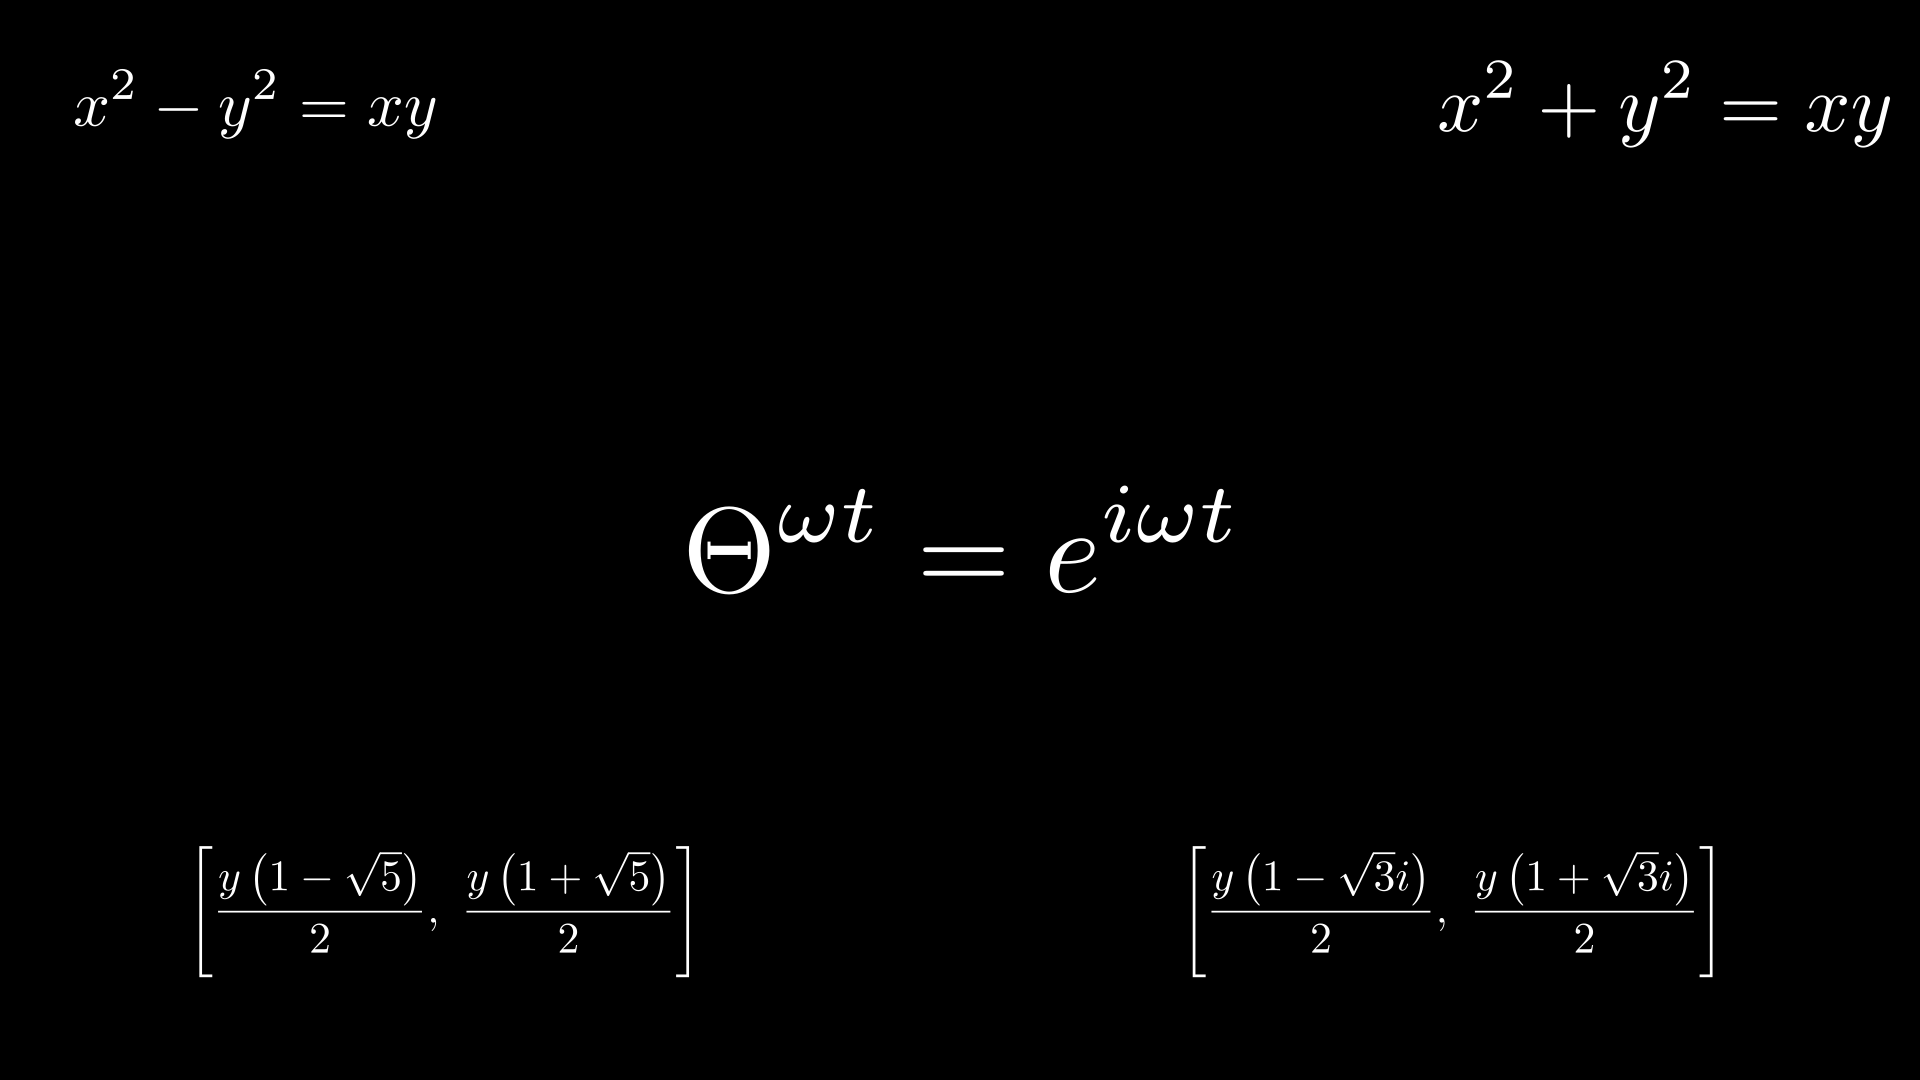

In [35]:
%%manim -qh MostrarTex
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
Theta_omega_t= sp.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sp.Equality(Theta**t,exp(i*t))
phi_relation=Eq(x**2-y**2,x*y)
cplx_phi_relation=Eq(x**2+y**2,x*y)

TexCenter=MathTex(latex(Theta_omega_t))
TexUL=MathTex(latex(phi_relation)).to_edge(UL).scale(0.8)
TexUR=MathTex(latex(cplx_phi_relation)).to_edge(UR)
TexDL=MathTex(latex(solve(phi_relation,x))).to_corner(DL)
TexDR=MathTex(latex(solve(cplx_phi_relation,x))).to_corner(DR)
Center_scale=1.8
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65

class MostrarTex(Scene):
    def construct(self):      
      
        
        self.add(TexCenter.scale(Center_scale))
        self.add(TexUL.scale(UL_scale))
        self.add(TexUR.scale(UR_scale))       
        self.add(TexDL.scale(DL_scale))
        self.add(TexDR.scale(DR_scale))

## Links Relacionados

Lissajous y Armonógrafo :

https://mathworld.wolfram.com/LissajousCurve.html